In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

In [46]:
y, sr = librosa.load("uke_g_string.wav", sr=16000)

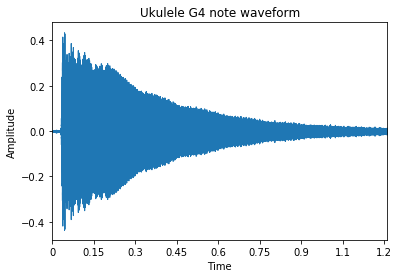

In [121]:
librosa.display.waveplot(y, sr=sr)
plt.title('Ukulele G4 note waveform')
plt.ylabel('Amplitude')
plt.savefig('uke_g4_waveplot.png', dpi=200)

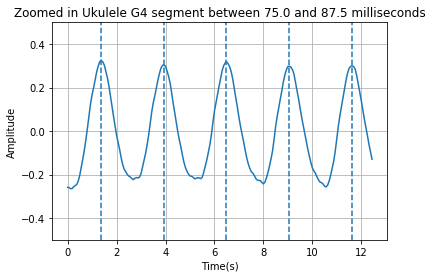

In [131]:
start = 1200
dur = int(sr*0.0125)
# librosa.display.waveplot(y[start:start+dur], sr=sr)
segment = y[start:start+dur]
timestamps = 1000*np.arange(len(segment))/sr
plt.plot(timestamps, segment)
a = timestamps[np.argmax(segment)]
period = 1000/391
for i in range(5):
    plt.axvline(a + i*period, linestyle='--')
plt.grid()
plt.title(f'Zoomed in Ukulele G4 segment between {1000*start/sr} and {1000*start/sr + 1000*dur/sr} milliseconds')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.ylim([-0.5, 0.5])
plt.savefig('uke_g4_zoomed.png', dpi=200)

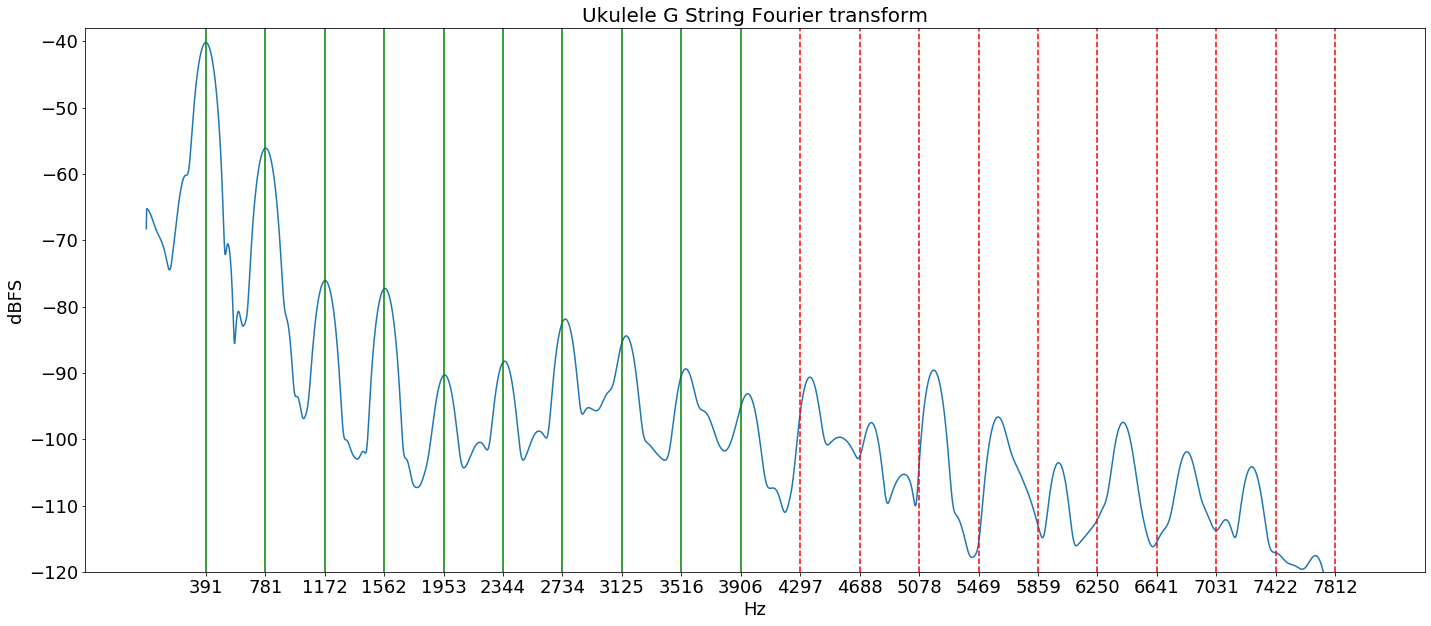

In [159]:
plt.figure(figsize=(24, 10))
f, Pxx = welch(y, nfft=8192, fs=sr)
plt.plot(f, 10*np.log10(abs(Pxx)))
f0 = np.argmax(Pxx)
xticks = []
for i in range(int(len(f)//f0)):
    if i < 10:
        color = 'g'
        linestyle = '-'
    else:
        color = 'r'
        linestyle = '--'
    plt.axvline(f[f0*(i+1)], linestyle=linestyle, color=color)
    xticks.append(f[f0*(i+1)])
plt.xticks(xticks);
plt.xlabel('Hz', fontsize=18);
plt.ylabel('dBFS', fontsize=18);
plt.title('Ukulele G String Fourier transform', fontsize=20)
plt.tick_params(labelsize=18)
plt.ylim([-120,-38])
plt.savefig('uke_g4_periodogram.png', dpi=400)
